In [1]:
import numpy
import random
import itertools
import pickle
import matplotlib.pyplot as plt

In [2]:
#### parameters
num_trials = 3
num_categories = 388
num_categories_transformed = [1, 50, 100, 150, 200, 250, 300, 350, 388]

params1 = [1, 50, 100, 150, 200, 250, 300, 350, 388] # number of transformed categories
params2 = ['blur', 'scale', 'quantization'] # transformation types
params_comb = [p for p in itertools.product(params1, params2)]

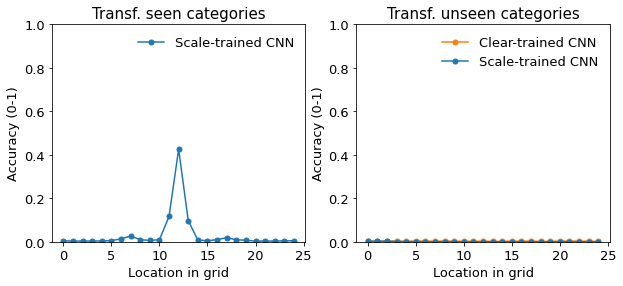

In [3]:
plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = '13'

#### accuracy by scale & translation
ids = [0,14] # none, scale
params = [0.2] # scale
params2 = [(0.,0.), (0,0.2), (0,0.4), (0,0.6), (0,0.8),
           (0.2, 0.), (0.2, 0.2), (0.2, 0.4), (0.2, 0.6), (0.2, 0.8),
           (0.4, 0.), (0.4, 0.2), (0.4, 0.4), (0.4, 0.6), (0.4, 0.8),
           (0.6, 0.), (0.6, 0.2), (0.6, 0.4), (0.6, 0.6), (0.6, 0.8),
           (0.8, 0.), (0.8, 0.2), (0.8, 0.4), (0.8, 0.6), (0.8, 0.8)] # top-left relative x, y location
acc_within = numpy.zeros((len(params), len(params2), len(ids), num_trials))
acc_across = numpy.zeros((len(params), len(params2), len(ids), num_trials))
for i, id in enumerate(ids):
    for t in range(num_trials):
        random.seed(t+1) # seed fixed
        category_orders = [i for i in range(num_categories)]
        random.shuffle(category_orders)

        with open('/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/v1/id{}_t{}/analysis_v1_accuracy_by_scale_translation.pickle'.format(id, t+1), 'rb') as f:
            data = pickle.load(f)
        acc_within[:,:,i,t] = data['accuracy1_within']
        acc_across[:,:,i,t] = data['accuracy1_across']

#### visualize - within
plt.subplot(1,2, 1)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(numpy.arange(len(params2)), numpy.mean(acc_within[0,:,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Location in grid')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0.1,1.])
plt.ylim(0,1)
plt.title('Transf. seen categories', fontdict = {'fontsize':15})
plt.legend(['Scale-trained CNN'], frameon=False)

#### visualize - across
plt.subplot(1,2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.plot(numpy.arange(len(params2)), numpy.mean(acc_across[0,:,0,:], axis=1), '.-', color='tab:orange', markersize=10)
plt.plot(numpy.arange(len(params2)), numpy.mean(acc_across[0,:,1,:], axis=1), '.-', color='tab:blue', markersize=10)
plt.xlabel('Location in grid')
plt.ylabel('Accuracy (0-1)')
# plt.xlim([0.1,1.])
plt.ylim(0,1)
plt.title('Transf. unseen categories', fontdict = {'fontsize':15})
plt.legend(['Clear-trained CNN', 'Scale-trained CNN'], frameon=False)
